Text(0.5, 1.0, '4param Mean data comparison')

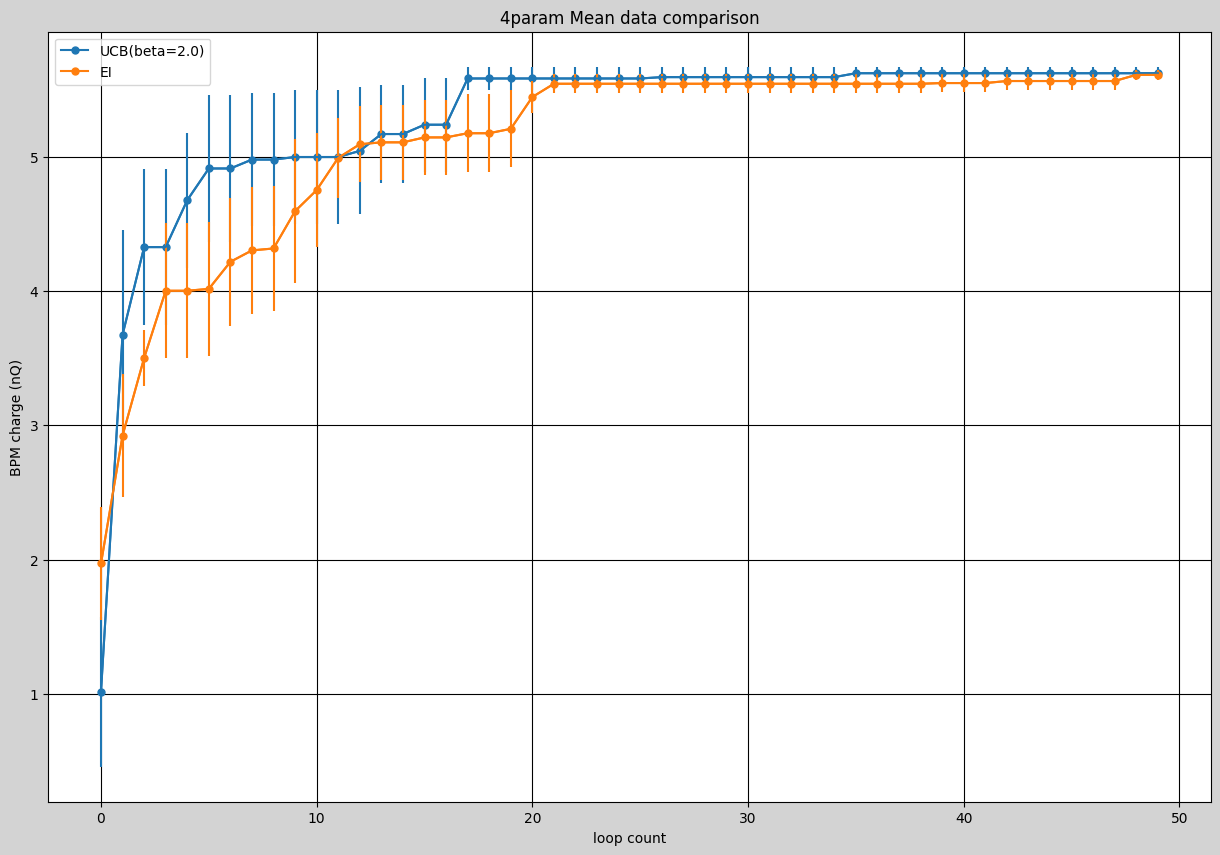

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

files1 = ["log_2023_05_31_09_51_57.csv", "log_2023_05_31_09_58_27.csv", "log_2023_05_31_10_03_58.csv", "log_2023_05_31_10_10_33.csv", ]
files2 = ["log_2023_05_31_10_17_54.csv", "log_2023_05_31_10_35_15.csv", "log_2023_05_31_10_40_42.csv", "log_2023_05_31_10_47_16.csv", ]

file = [files1, files2]

df = [[0, 0, 0, 0], 
      [0, 0, 0, 0]]

sum = [[0]*50]*2
mean = [[0]*50]*2
sum_minus_mean = [[0]*50]*2
error = [[0]*50]*2

fig_ave,ax_ave = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

for j in range(2):
    for i in range(4):
        df[j][i] = pd.read_csv(file[j][i], 
        names = ["n","y","x0","x1","x2","x3","ymax","x0max","x1max","x2max","x3max"],
        encoding="SHIFT-JIS")
        
        sum[j] = sum[j] + df[j][i]["ymax"]
        
    mean[j] = sum[j]/(i+1)

    for k in range(4):
            
            sum_minus_mean[j] = sum_minus_mean[j] + (df[j][k]["ymax"] - mean[j])**2
            
    error[j] = ((sum_minus_mean[j])**(0.5))/(k+1)

plt.plot(df[0][0]["n"],mean[0], marker = "." , markersize = 10 , label = "UCB(beta=2.0)")
plt.errorbar(df[0][0]["n"],mean[0], yerr=error[0],color='C0')
plt.plot(df[0][0]["n"],mean[1], marker = "." , markersize = 10 , label = "EI")
plt.errorbar(df[0][0]["n"],mean[1], yerr=error[1],color='C1')


ax_ave.grid(which = "major" , color = "black" , linestyle = "-")
ax_ave.set_xlabel("loop count")
ax_ave.set_ylabel("BPM charge (nQ)")
ax_ave.legend()
ax_ave.set_title('4param Mean data comparison')

    